<a href="https://colab.research.google.com/github/Wenzl-C/Codecademy-Projects/blob/main/Feature_Wrapper_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Wrapper Method Practice:

In [1]:
# Import libraries
!pip install mlxtend
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

## Evaluating a Logistic Regression Model:
Obesity data set predictor variables
- Gender is 1 if a respondent is male and 0 if a respondent is female.
- Age is a respondent's age in years.
- family_history_with_overweight is 1 if a respondent has family member who is or was overweight, 0 if not.
- FAVC is 1 if a respondent eats high caloric food frequently, 0 if not.
- FCVC is 1 if a respondent usually eats vegetables in their meals, 0 if not.
- NCP represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).
- CAEC represents how much food a respondent eats between meals on a scale of 0 to 3.
- SMOKE is 1 if a respondent smokes, 0 if not.
- CH2O represents how much water a respondent drinks on a scale of 0 to 2.
- SCC is 1 if a respondent monitors their caloric intake, 0 if not.
- FAF represents how much physical activity a respondent does on a scale of 0 to 3.
- TUE represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.
- CALC represents how often a respondent drinks alcohol on a scale of 0 to 3.
- Automobile, Bike, Motorbike, Public_Transportation, and Walking indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a 1 and the other columns will contain a 0.

The outcome vaiable , NObayesdad, is a 1 if a patient is obese and a 0 if not.

In [3]:
# Loading the data
obesity = pd.read_csv('/content/sample_data/obesity.csv')

obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [6]:
# Splitting the data into two Dataframes for predictor and outcome variables.

x = obesity.drop(['NObeyesdad'], axis=1)
y = obesity['NObeyesdad']

In [13]:
# Logistic regression model

lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(x, y)

# Model accuracy
print(f'Fit Score: {lr.score(x, y):.4f}')

Fit Score: 0.7665


## Sequential Forward Selection

In [22]:
# Create a Sequential Forward Selection
sfs = SFS(lr,
          k_features=9,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit the model
sfs = sfs.fit(x, y)

In [18]:
# Inspect the feature names and accuracy of the model
print(f'Feature Names:', sfs.subsets_[9]['feature_names'])
print(f'Accuracy Score: {sfs.subsets_[9]["avg_score"]:.4f}')

Feature Names: ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
Accuracy Score: 0.7835


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


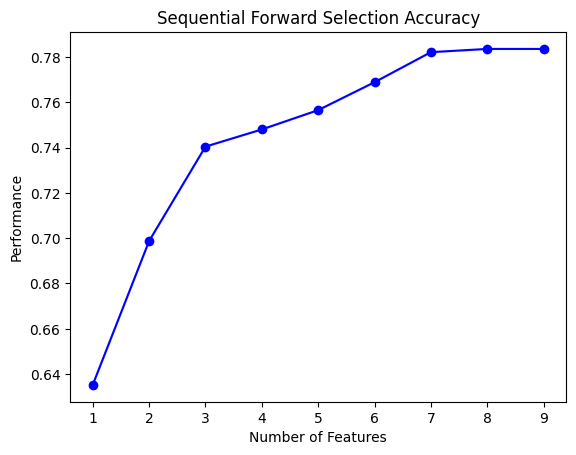

In [20]:
# Vizulizing the sequential forward selection accuracy

plot_sfs(sfs.get_metric_dict())
plt.title('Sequential Forward Selection Accuracy')
plt.show()

## Sequentil Backward Selection

In [24]:
# Creating a sequential backward selection model

sbs = SFS(lr,
          k_features=7,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit the model
sbs = sbs.fit(x, y)

In [25]:
# Check the features and accuracy of the model

print(sbs.subsets_[7]['feature_names'])
print(f'Accuracy Score: {sbs.subsets_[7]["avg_score"]:.4f}')

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
Accuracy Score: 0.7821


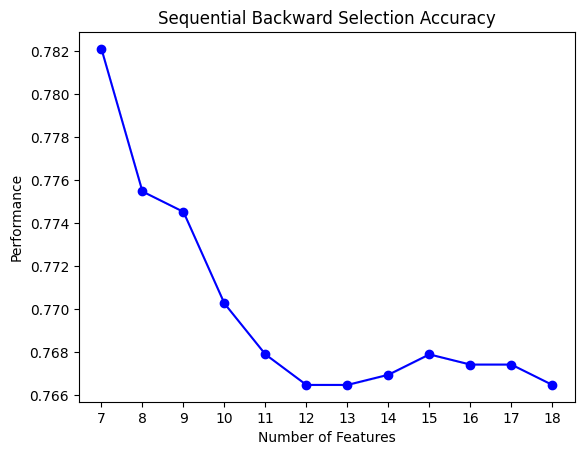

In [27]:
# Visualize the accuracy of the sbs model

plot_sfs(sbs.get_metric_dict())
plt.title('Sequential Backward Selection Accuracy')
plt.show()

## Recursive Feature Elimination

In [30]:
# Features reference for later use
features = x.columns

# Standardizing the data
x_stand = pd.DataFrame(StandardScaler().fit_transform(x))

In [33]:
# Recursive feature elimination model
rfe = RFE(lr, n_features_to_select=8)

#Fit the model
rfe.fit(x_stand, y)

# Model evalutation
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support ]
print(rfe_features)
print(f'Accuracy Score: {rfe.score(x_stand, y):.4f}')

['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']
Accuracy Score: 0.7679
